# "A Predictive Model for Early Detection of Lung Cancer"

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data gathering
data=pd.read_csv("C:/Users/asus/OneDrive/Desktop/Lung_Cancer/lung_cancer_dataset.csv")

In [3]:
data.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [4]:
data.tail()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
49995,149995,81,Female,9.386431,Medium,No,Yes,No,Moderate,No,Yes
49996,149996,28,Male,99.471718,Medium,No,Yes,No,Moderate,No,Yes
49997,149997,90,Male,14.349722,Low,Yes,Yes,No,Heavy,Yes,Yes
49998,149998,33,Female,87.012555,Medium,No,No,Yes,Moderate,No,No
49999,149999,31,Male,37.596851,Low,No,No,Yes,NaN,Yes,Yes


## Domain Analysis

In [5]:
data.describe()

,patient_id,age,pack_years
count,50000.000000,50000.000000,50000.000000
mean,124999.500000,58.857040,49.963424
std,14433.901067,23.958266,28.852082
min,100000.000000,18.000000,0.002753
25%,112499.750000,38.000000,24.774558
50%,124999.500000,59.000000,50.177634
75%,137499.250000,80.000000,75.066740
max,149999.000000,100.000000,99.999204


In [6]:
data.describe(include=['object'])

,gender,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
count,50000,50000,50000,50000,50000,33338,50000,50000
unique,2,3,2,2,2,2,2,2
top,Female,Low,No,Yes,Yes,Heavy,No,Yes
freq,25085,16682,25151,25067,25066,16762,25017,34364


In [7]:
data.shape

(50000, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [9]:
# drop unique column
data.drop(['patient_id'],axis=1,inplace=True)

# Explanatory Data Analysis

In [10]:
# pip install ydata-profiling


In [11]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_notebook_iframe()   # inside Jupyter


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 50.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

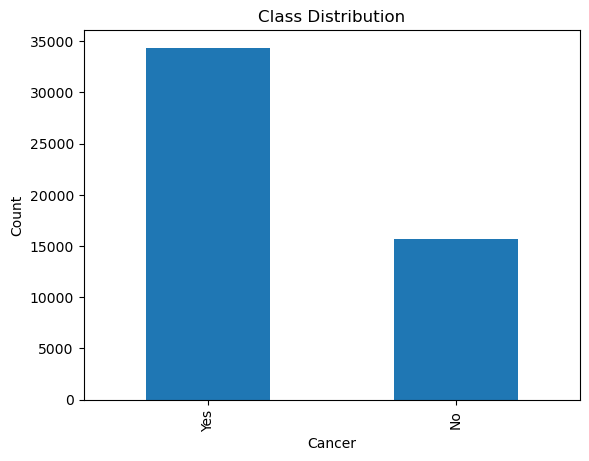

In [12]:

data["lung_cancer"].value_counts().plot(kind="bar", title="Class Distribution")
plt.xlabel("Cancer")
plt.ylabel("Count")
plt.show()


# Data Preprocessing

In [13]:
data.isnull().sum()

age                              0
gender                           0
pack_years                       0
radon_exposure                   0
asbestos_exposure                0
secondhand_smoke_exposure        0
copd_diagnosis                   0
alcohol_consumption          16662
family_history                   0
lung_cancer                      0
dtype: int64

### handle missing value 

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data['alcohol_consumption'] = imputer.fit_transform(data[['alcohol_consumption']]).ravel()



In [15]:
data.head()

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,89,Female,0.408278,Medium,Yes,Yes,Yes,Heavy,No,Yes
3,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,38,Female,44.432440,Medium,Yes,No,Yes,Heavy,Yes,Yes


In [16]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

from sklearn.preprocessing import OneHotEncoder
#data = pd.get_dummies(data, columns=categorical_cols)
data= pd.get_dummies(data, columns=categorical_cols, drop_first=True)



Categorical columns: Index(['gender', 'radon_exposure', 'asbestos_exposure',
       'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption',
       'family_history', 'lung_cancer'],
      dtype='object')


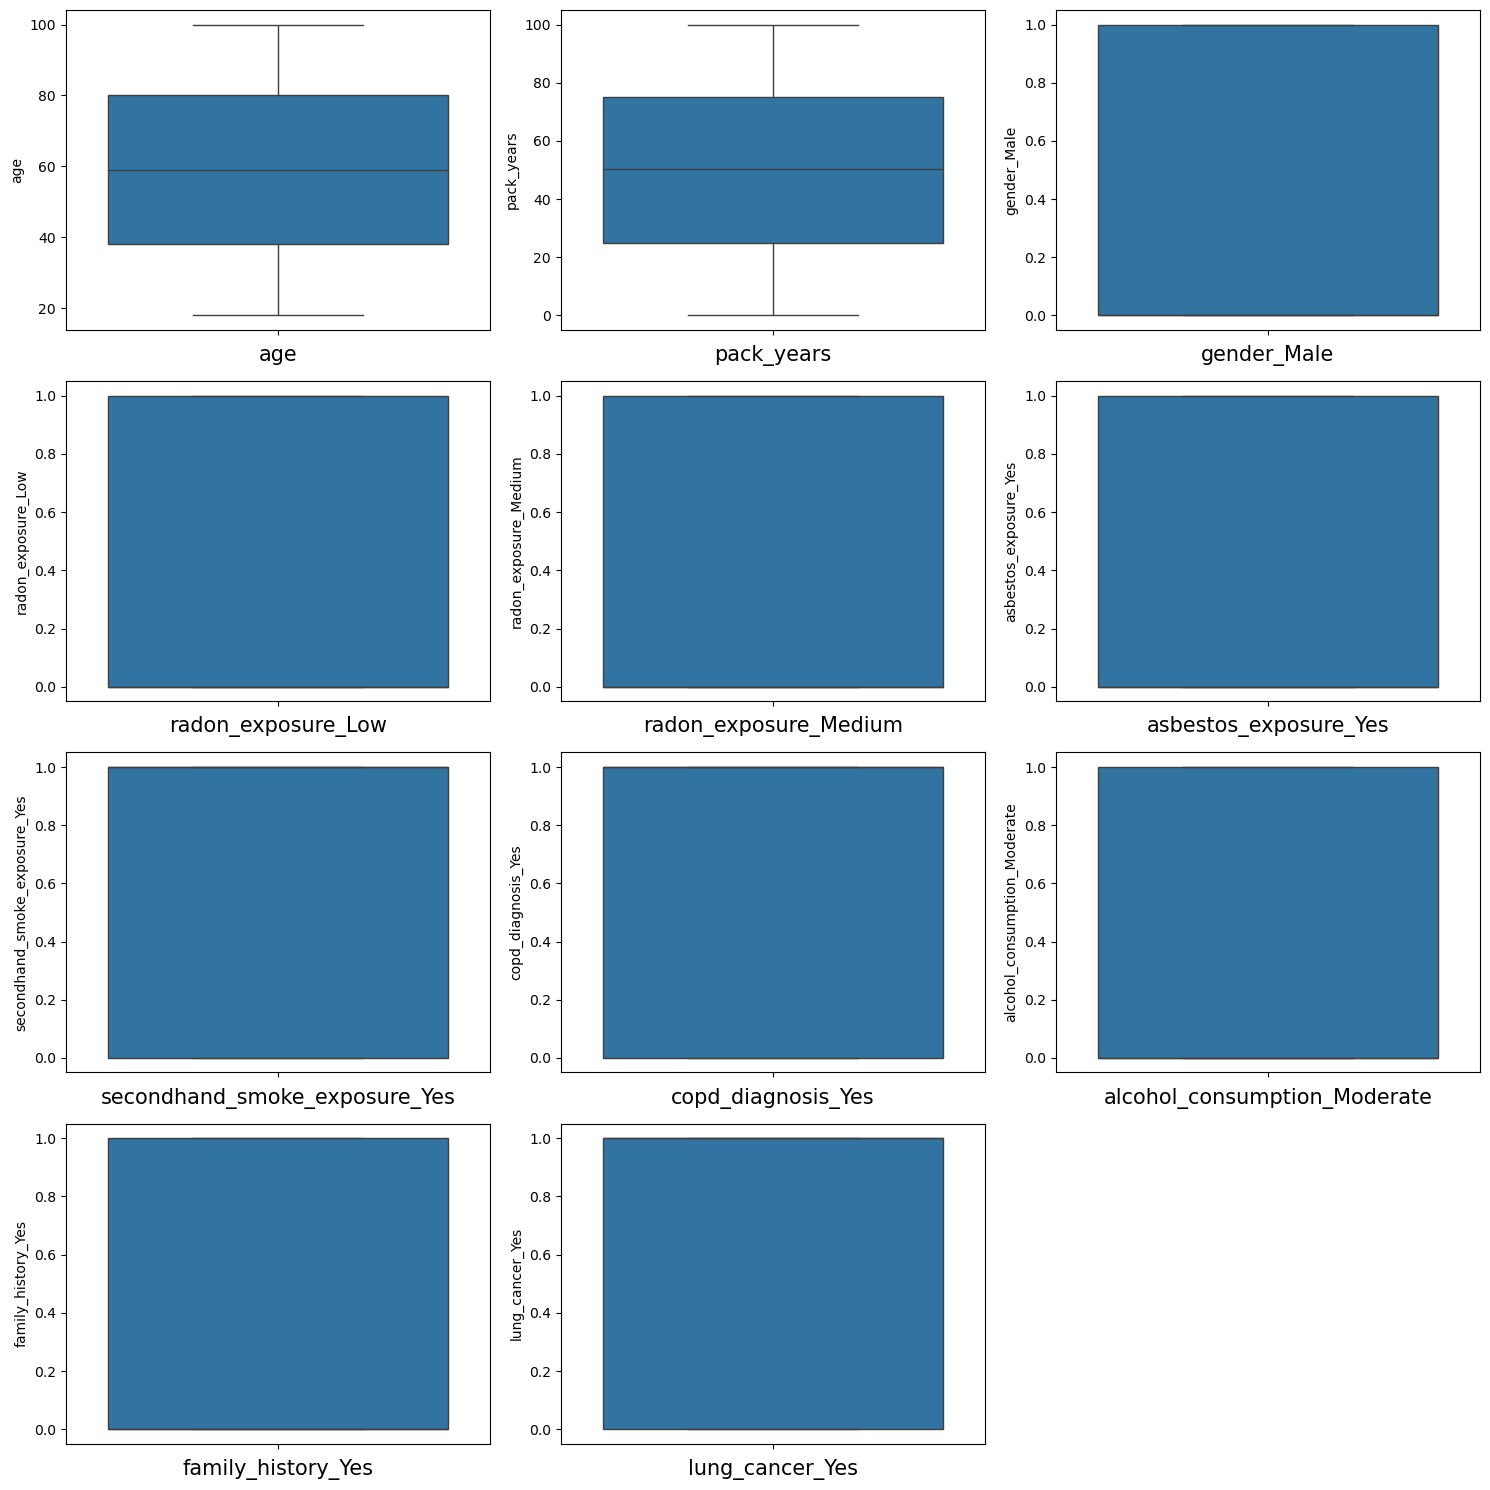

In [17]:
# Detecting outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

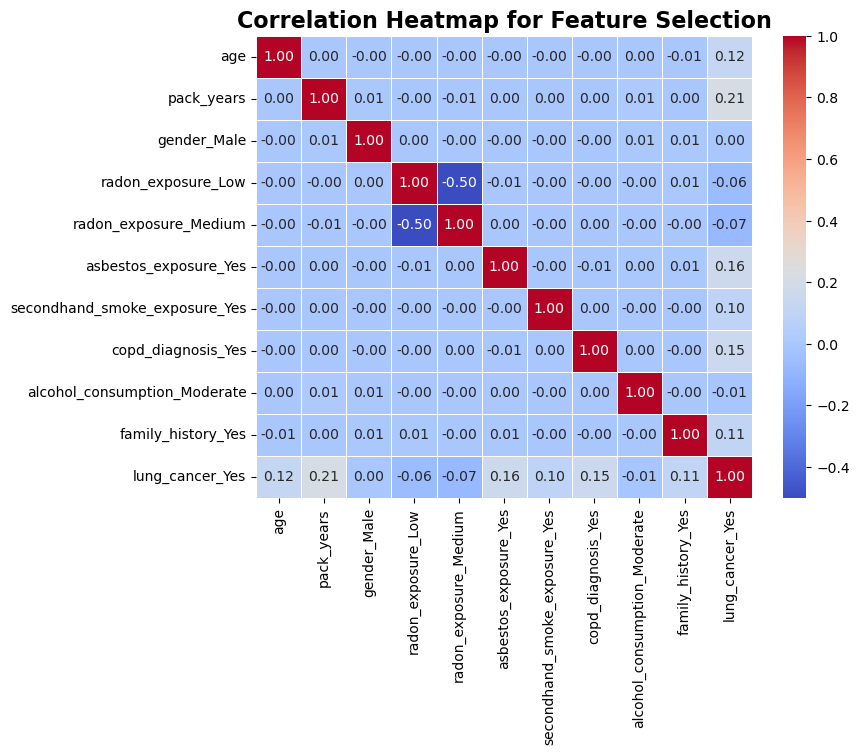

In [18]:
df = pd.DataFrame(data)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap for Feature Selection", fontsize=16, fontweight='bold')
plt.show()

No single feature shows a strong correlation with lung cancer. However, pack_years, asbestos_exposure, COPD diagnosis, age, and family_history are relatively more relevant and could be useful in a predictive model.

In [19]:
x = data.drop("lung_cancer_Yes", axis=1)
y = data["lung_cancer_Yes"]


In [20]:
x.head()

,age,pack_years,gender_Male,radon_exposure_Low,radon_exposure_Medium,asbestos_exposure_Yes,secondhand_smoke_exposure_Yes,copd_diagnosis_Yes,alcohol_consumption_Moderate,family_history_Yes
0,69,66.025244,True,False,False,False,False,True,True,False
1,32,12.780800,False,False,False,False,True,True,True,True
2,89,0.408278,False,False,True,True,True,True,False,False
3,78,44.065232,False,True,False,False,True,False,True,False
4,38,44.432440,False,False,True,True,False,True,False,True


In [21]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Define numeric columns to scale
numeric_cols = ['age', 'pack_years']

# Step 2: Scale numeric columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Step 3: Combine scaled numeric columns with the rest of the dataset
X = pd.concat([scaled_df, x.drop(columns=numeric_cols).reset_index(drop=True)], axis=1)

# Optional: Check the result
print(X.head())
print("Input feature shape:", X.shape)


        age  pack_years  gender_Male  radon_exposure_Low  \
0  0.621951    0.660248         True               False   
1  0.170732    0.127785        False               False   
2  0.865854    0.004055        False               False   
3  0.731707    0.440640        False                True   
4  0.243902    0.444313        False               False   

   radon_exposure_Medium  asbestos_exposure_Yes  \
0                  False                  False   
1                  False                  False   
2                   True                   True   
3                  False                  False   
4                   True                   True   

   secondhand_smoke_exposure_Yes  copd_diagnosis_Yes  \
0                          False                True   
1                           True                True   
2                           True                True   
3                           True               False   
4                          False                True

In [22]:
X.head()

,age,pack_years,gender_Male,radon_exposure_Low,radon_exposure_Medium,asbestos_exposure_Yes,secondhand_smoke_exposure_Yes,copd_diagnosis_Yes,alcohol_consumption_Moderate,family_history_Yes
0,0.621951,0.660248,True,False,False,False,False,True,True,False
1,0.170732,0.127785,False,False,False,False,True,True,True,True
2,0.865854,0.004055,False,False,True,True,True,True,False,False
3,0.731707,0.440640,False,True,False,False,True,False,True,False
4,0.243902,0.444313,False,False,True,True,False,True,False,True


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
X_train.shape

(37500, 10)

In [25]:
y_train.shape

(37500,)

In [26]:
X_test.shape

(12500, 10)

In [27]:
y_test.shape

(12500,)

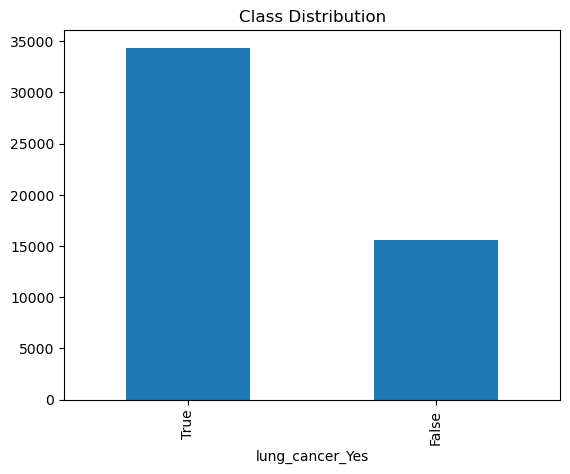

In [28]:
# check data balancing 
data['lung_cancer_Yes'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

here we can see that data is unbalance so we want to balance data using smote.

In [29]:
#!pip install imbalanced-learn

In [35]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE() ## object creation

In [36]:
y_train.value_counts()
X_res, y_res = smote.fit_resample(X_train.astype('float'),y_train)
y=np.array(y_res)

In [37]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_res))

Actual Classes Counter({True: 25764, False: 11736})
SMOTE Classes Counter({True: 25764, False: 25764})


# Feature Selection

In [39]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_res,y_res)
print(model.feature_importances_)

[0.36178293 0.46142687 0.02142315 0.01804893 0.01751655 0.0310112
 0.01825708 0.03138618 0.01948347 0.01966365]


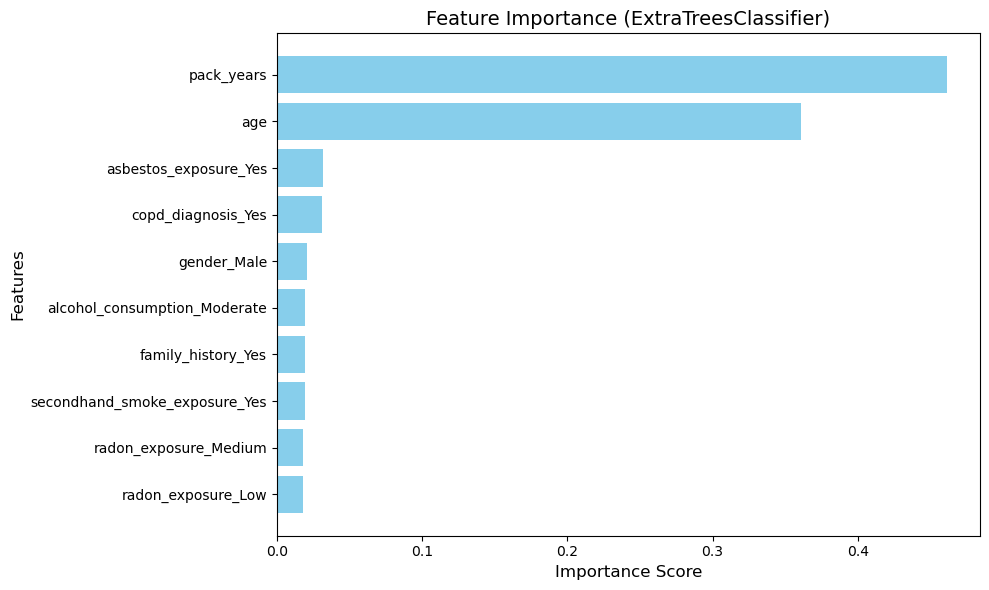

In [43]:
# Get feature importances
importances = model.feature_importances_

# Get feature names (from your dataset)
feature_names = x_res.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Create a DataFrame for visualization
feat_importance = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Puts most important feature at the top
plt.title("Feature Importance (ExtraTreesClassifier)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


# Model Bulding
## Random Forest

In [44]:
# Initialize the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=10,           # max depth per tree
    min_samples_split=5,    # minimum samples to split a node
    min_samples_leaf=2,     # minimum samples required at a leaf node
    random_state=42
)

# Fit the model
rf_model.fit(x_res, y_res)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [45]:
y_pred = rf_model.predict(X_test)

In [46]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.68752
Confusion Matrix:
 [[2603 1297]
 [2609 5991]]
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.67      0.57      3900
        True       0.82      0.70      0.75      8600

    accuracy                           0.69     12500
   macro avg       0.66      0.68      0.66     12500
weighted avg       0.72      0.69      0.70     12500



In [47]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.7320533333333333


# XGboost model

In [52]:
# install (choose one)
!pip install xgboost --quiet
# or, if you use conda
# !conda install -c conda-forge xgboost -y


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(x_res, y_res)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print("Accuracy:", acc)
print("ROC AUC:", roc)
print("PR AUC:", pr_auc)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)



Accuracy: 0.71024
ROC AUC: 0.7598930232558139
PR AUC: 0.8761094343623679
Confusion matrix:
 [[2317 1583]
 [2039 6561]]
Classification report:
               precision    recall  f1-score   support

       False     0.5319    0.5941    0.5613      3900
        True     0.8056    0.7629    0.7837      8600

    accuracy                         0.7102     12500
   macro avg     0.6688    0.6785    0.6725     12500
weighted avg     0.7202    0.7102    0.7143     12500



In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, x_res, y_res, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", np.mean(scores))


Cross-validation scores: [0.67572288 0.67834271 0.78187464 0.79456574 0.79932072]
Mean CV accuracy: 0.7459653383749832


##                                    ************ got 74 % Accurasy *********

In [ ]:
# Open file in write-binary mode
import pickle
with open("data.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Data has been pickled (saved) successfully!")
